> https://woolulu.tistory.com/135

## **1. 데이터&라이브러리 불러오기**

In [114]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import load_img
from imutils import paths
import argparse
import numpy as np

import matplotlib.pyplot as plt
import os
import shutil

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [117]:
%rm -r "/content/content/Data_4(테스트_트레인 분류 + 사진 자르기)"

In [118]:
!unzip '/content/drive/MyDrive/데이터 크리에이터 캠프/Data/Data_4(테스트_트레인 분류 + 사진 자르기).zip'

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/bottoms/img1635.jpg  
  inflating: content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/bottoms/img50.jpg  
  inflating: content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/bottoms/img4962.jpg  
  inflating: content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/bottoms/img25137.jpg  
  inflating: content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/bottoms/img15322.jpg  
  inflating: content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/bottoms/img8444.jpg  
  inflating: content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/bottoms/img27640.jpg  
  inflating: content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/bottoms/img22842.jpg  
  inflating: content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/bottoms/img24293.jpg  
  inflating: content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/bottoms/img22862.jpg  
  inflating: content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/bottoms/img22978.jpg  
  inflating: content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/bottoms/img18289.jpg  
  inflating: content/Data_4(테스트_트레

In [119]:
test_bottoms_cnt = len(os.listdir("/content/content/Data_4(테스트_트레인 분류 + 사진 자르기)/test/bottoms"))
test_capandhat_cnt = len(os.listdir("/content/content/Data_4(테스트_트레인 분류 + 사진 자르기)/test/cap_and_hat"))
test_outerwear_cnt = len(os.listdir("/content/content/Data_4(테스트_트레인 분류 + 사진 자르기)/test/outerwear"))
test_shoes_cnt = len(os.listdir("/content/content/Data_4(테스트_트레인 분류 + 사진 자르기)/test/shoes"))
test_tops_cnt = len(os.listdir("/content/content/Data_4(테스트_트레인 분류 + 사진 자르기)/test/tops"))
print('테스트 데이터 수 :', test_bottoms_cnt + test_capandhat_cnt + test_outerwear_cnt + test_shoes_cnt + test_tops_cnt)

train_bottoms_cnt = len(os.listdir("/content/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/bottoms"))
train_capandhat_cnt = len(os.listdir("/content/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/cap_and_hat"))
train_outerwear_cnt = len(os.listdir("/content/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/outerwear"))
train_shoes_cnt = len(os.listdir("/content/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/shoes"))
train_tops_cnt = len(os.listdir("/content/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/tops"))
print('트레인 데이터 수 :', train_bottoms_cnt + train_capandhat_cnt + train_outerwear_cnt + train_shoes_cnt + train_tops_cnt)

테스트 데이터 수 : 5961
트레인 데이터 수 : 23778


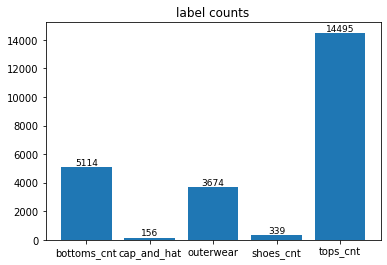

In [120]:
x = np.arange(5)
labels = ['bottoms_cnt', 'cap_and_hat', 'outerwear', 'shoes_cnt', 'tops_cnt']
values = [train_bottoms_cnt, train_capandhat_cnt, train_outerwear_cnt, train_shoes_cnt, train_tops_cnt]

plt.bar(x, values)
plt.xticks(x, labels)

for i, v in enumerate(x):
    plt.text(v, values[i], str(values[i]),
             fontsize=9,             
             horizontalalignment='center',
             verticalalignment='bottom')

plt.title('label counts')
plt.show()

모두 5000정도로 맞춰줘야겠다

In [121]:
cnt = 0
for i in os.listdir('/content/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/tops'):      
  
  file_path = "/content/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/tops/" + i
  os.remove(file_path)

  cnt += 1
  if cnt==9000:
    break

먼저 tops 데이터 수를 5000개로 맞춰줬다.

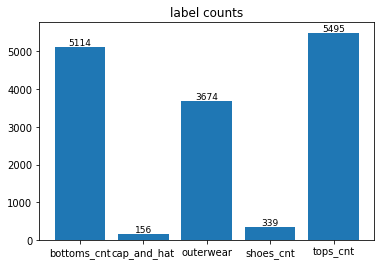

In [122]:
train_bottoms_cnt = len(os.listdir("/content/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/bottoms"))
train_capandhat_cnt = len(os.listdir("/content/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/cap_and_hat"))
train_outerwear_cnt = len(os.listdir("/content/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/outerwear"))
train_shoes_cnt = len(os.listdir("/content/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/shoes"))
train_tops_cnt = len(os.listdir("/content/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/tops"))

x = np.arange(5)
labels = ['bottoms_cnt', 'cap_and_hat', 'outerwear', 'shoes_cnt', 'tops_cnt']
values = [train_bottoms_cnt, train_capandhat_cnt, train_outerwear_cnt, train_shoes_cnt, train_tops_cnt]

plt.bar(x, values)
plt.xticks(x, labels)

for i, v in enumerate(x):
    plt.text(v, values[i], str(values[i]),
             fontsize=9,             
             horizontalalignment='center',
             verticalalignment='bottom')

plt.title('label counts')
plt.show()

## **2. 사진 증강**

### **2.1 모자 사진 증강 수행**

In [111]:
for i in os.listdir('/content/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/cap_and_hat') + os.listdir('/content/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/cap_and_hat'):
  
  file_path = "/content/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/cap_and_hat/" + i

  image = load_img(file_path)
  image = img_to_array(image)
  image = np.expand_dims(image, axis=0)  # 맨 앞 1차원 추가

  aug = ImageDataGenerator(
      rotation_range=30,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode="nearest",
  )

  imageGen = aug.flow(
      image,
      batch_size=1,
      save_to_dir="/content/Aug_Data/cap_and_hat",    
      save_format="jpg",
  )

  total = 0
  for image in imageGen:      
      total += 1
      
      if total == 31:
          break

  if len(os.listdir("/content/Aug_Data/cap_and_hat")) > 4844: # 파일 이름이 겹쳐 삭제되는 파일이 있어 특정 개수가 되면 break 포인트를 걸어주는 방식으로 코드를 짰다.
    break

In [112]:
len(os.listdir("/content/Aug_Data/cap_and_hat"))

4860

### **2.2 모자 증강한 사진 기존 폴더에 넣기**

In [123]:
for i in os.listdir('/content/Aug_Data/cap_and_hat'):
  file_name = i
  file_path = "/content/Aug_Data/cap_and_hat/" + i
  shutil.copy(file_path, '/content/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/cap_and_hat/' + file_name) 

In [124]:
len(os.listdir("/content/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/cap_and_hat"))

5016

### **2.3 겉옷 사진 증강 수행**

In [126]:
for i in os.listdir('/content/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/outerwear') + os.listdir('/content/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/outerwear'):
  
  file_path = "/content/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/outerwear/" + i

  image = load_img(file_path)
  image = img_to_array(image)
  image = np.expand_dims(image, axis=0)  # 맨 앞 1차원 추가

  aug = ImageDataGenerator(
      rotation_range=30,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode="nearest",
  )

  imageGen = aug.flow(
      image,
      batch_size=1,
      save_to_dir="/content/Aug_Data/outerwear",    
      save_format="jpg",
  )

  total = 0
  for image in imageGen:      
      total += 1
      
      if total == 1:
          break

  if len(os.listdir("/content/Aug_Data/outerwear")) > 4661: # 파일 이름이 겹쳐 삭제되는 파일이 있어 특정 개수가 되면 break 포인트를 걸어주는 방식으로 코드를 짰다.
    break

In [127]:
len(os.listdir("/content/Aug_Data/outerwear"))

1327

### **2.4 겉옷 증강한 사진 기존 폴더에 넣기**

In [128]:
for i in os.listdir('/content/Aug_Data/outerwear'):
  file_name = i
  file_path = "/content/Aug_Data/outerwear/" + i
  shutil.copy(file_path, '/content/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/outerwear/' + file_name) 

In [129]:
len(os.listdir("/content/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/outerwear"))

5001

### **2.5 신발 사진 증강 수행**

In [130]:
for i in os.listdir('/content/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/shoes') + os.listdir('/content/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/shoes'):
  
  file_path = "/content/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/shoes/" + i

  image = load_img(file_path)
  image = img_to_array(image)
  image = np.expand_dims(image, axis=0)  # 맨 앞 1차원 추가

  aug = ImageDataGenerator(
      rotation_range=30,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode="nearest",
  )

  imageGen = aug.flow(
      image,
      batch_size=1,
      save_to_dir="/content/Aug_Data/shoes_cnt",    
      save_format="jpg",
  )

  total = 0
  for image in imageGen:      
      total += 1
      
      if total == 14:
          break

  if len(os.listdir("/content/Aug_Data/shoes_cnt")) > 4661: # 파일 이름이 겹쳐 삭제되는 파일이 있어 특정 개수가 되면 break 포인트를 걸어주는 방식으로 코드를 짰다.
    break

In [131]:
len(os.listdir("/content/Aug_Data/shoes_cnt"))

4668

### **2.6 신발 증강한 사진 기존 폴더에 넣기**

In [132]:
for i in os.listdir('/content/Aug_Data/shoes_cnt'):
  file_name = i
  file_path = "/content/Aug_Data/shoes_cnt/" + i
  shutil.copy(file_path, '/content/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/shoes/' + file_name) 

In [133]:
len(os.listdir("/content/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/shoes"))

5007

### **2.7 개수 확인**

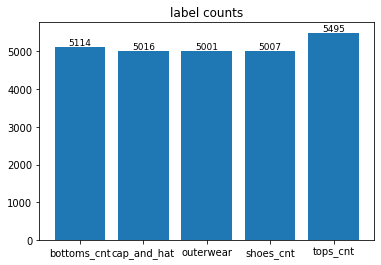

In [134]:
train_bottoms_cnt = len(os.listdir("/content/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/bottoms"))
train_capandhat_cnt = len(os.listdir("/content/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/cap_and_hat"))
train_outerwear_cnt = len(os.listdir("/content/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/outerwear"))
train_shoes_cnt = len(os.listdir("/content/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/shoes"))
train_tops_cnt = len(os.listdir("/content/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/tops"))

x = np.arange(5)
labels = ['bottoms_cnt', 'cap_and_hat', 'outerwear', 'shoes_cnt', 'tops_cnt']
values = [train_bottoms_cnt, train_capandhat_cnt, train_outerwear_cnt, train_shoes_cnt, train_tops_cnt]

plt.bar(x, values)
plt.xticks(x, labels)

for i, v in enumerate(x):
    plt.text(v, values[i], str(values[i]),
             fontsize=9,             
             horizontalalignment='center',
             verticalalignment='bottom')

plt.title('label counts')
plt.show()

## **3 폴더 저장**

In [135]:
!zip -r '/content/drive/MyDrive/대회/데이터 크리에이터 캠프/Data/Data_5(테스트_트레인 분류 + 사진 자르기 + 클래스 불균형 맞추기기).zip' '/content/content/Data_4(테스트_트레인 분류 + 사진 자르기)/'
# 폴더를 압축하기 위해서는 r 옵션을 사용해야한다.

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  adding: content/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/shoes/_0_9705.jpg (deflated 2%)
  adding: content/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/shoes/_0_7495.jpg (deflated 2%)
  adding: content/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/shoes/_0_6938.jpg (deflated 10%)
  adding: content/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/shoes/_0_2672.jpg (deflated 5%)
  adding: content/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/shoes/_0_5563.jpg (deflated 2%)
  adding: content/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/shoes/_0_2482.jpg (deflated 8%)
  adding: content/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/shoes/img1834.jpg (deflated 1%)
  adding: content/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/shoes/_0_9659.jpg (deflated 5%)
  adding: content/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/shoes/_0_1905.jpg (deflated 3%)
  adding: content/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/shoes/_0_1199.jpg (deflated 1%)
  adding: content/content/Data_4(테스트_트레인 분류